In [1]:
# benjamin_wolcott@brown.edu, wolcottb
# HW 1

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal
%matplotlib inline  

Text(0.5, 1.0, 'Output Voltage from RK4 Method')

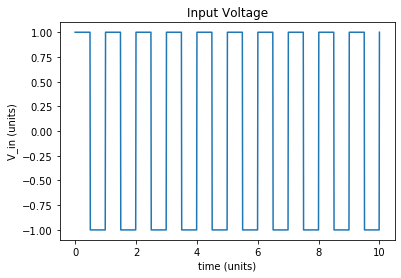

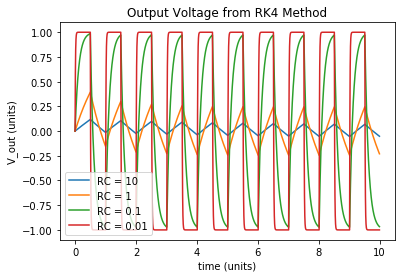

In [84]:
# Problem 1

# Using Kirchoff's current law we equate I_R, the current across the resistor = (V_out - V_in)/R and
# I_c, the current across the capacitor = -C(dV_out/dt), to get dV_out/dt = -(V_out - V_in)/RC

# Use RK4 integrator to solve for square wave input signal

def approx_rk4(dt, t_final, RC, V_in, V0, t0=0.0):
    
    # number of time steps, nust be an integer
    n  = int(t_final/dt) 
    
    #initialize some empty lists to store our data and time steps
    V_list = []
    t_list = []
    
    # the main loop over all time steps
    for ii in range(n):
        if ii == 0.0:
            # set initial conditions at time zero
            V = V0
            t = t0
        else :            
            k1 = -dt*(V - V_in(t))
            V1 = V + k1/2
            k2 = dt*g(RC, V_in(t), V1)
            V2 = V + k2/2
            k3 = dt*g(RC, V_in(t), V2)
            V3 = V + k3
            k4 = dt*g(RC, V_in(t), V3)
            
            # update value of V at each time step and step time by dt
            V+= (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            t+= dt 
            
        # use append to add on to the end of a list
        V_list.append(V)
        t_list.append(t)
    
    # we turn the lists into numpy arrays before returning
    
    V_list = np.array(V_list)
    t_list = np.array(t_list)
    
    return t_list, V_list

def g(RC, V_in, V):
    g = -(1/(RC))*(V - V_in)
    return g

# Define our constants
V0, t0 = 0.0, 0.0
t_final, dt = 10, 0.01

# Define t and V_in
t = np.linspace(t0,t_final,1000) 

def V_in(t):
    V_in = sp.signal.square(t*2*np.pi)
    return V_in

# Plot the square wave input voltage
V_inplot = sp.signal.square(t*2*np.pi)
plt.plot(t, V_inplot)
plt.xlabel("time (units)")
plt.ylabel("V_in (units)")
plt.title('Input Voltage')

#Call our  approximate function for different RC values, this returns function values and time points 
t_approx10, V_approx10 = approx_rk4(dt, t_final, 10, V_in, V0)
t_approx1, V_approx1 = approx_rk4(dt, t_final, 1, V_in, V0)
t_approx01, V_approx01 = approx_rk4(dt, t_final, 0.1, V_in, V0)
t_approx001, V_approx001 = approx_rk4(dt, t_final, 0.01, V_in, V0)

# Generate rk4 plots 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_approx10, V_approx10, linestyle = '-', label = "RC = 10")
ax.plot(t_approx1, V_approx1, linestyle = '-', label = "RC = 1")
ax.plot(t_approx01, V_approx01, linestyle = '-', label = "RC = 0.1")
ax.plot(t_approx001, V_approx001, linestyle = '-', label = "RC = 0.01")
plt.legend()
plt.xlabel("time (units)")
plt.ylabel("V_out (units)")
plt.title('Output Voltage from RK4 Method')

# For larger RC value, the system is able to react less quickly to the input voltage switching because more charge can be
# stored in the capacitor/less current flows through the resistor. When we decrease the RC value we see that the output
# voltage more quickly responds to changes in the input voltage. If we can alter the value of RC in the cirucit, we
# can control the output voltage for a given input signal: allow it to pass through mostly unaltered for small RC and

In [28]:
# ODE Integrator Using RK4 Method

def approx_rk4(dt, t_final, N_a0, N_b0, T_a, T_b, t0=0.0):
    
    # number of time steps, nust be an integer
    npoints  = int(t_final/dt) 
    #initialize some empty lists to store our data and time steps
    N_list = []
    N_list = np.array(N_list)
    t_list = []
    
    # the main loop over all time steps
    for ii in range(npoints):
        if ii == 0.0:
            # set initial conditions at time zero
            N = np.array([N_a0, N_b0])
            t = t0
            #print(N)
            #print(N*-.1)
        else :            
            #print(N)
            k1 = N*-.1
            #print(k1)
            N1 = N + k1/2
            print(N1)
            k2 = dt*g(N1[0], N1[1], T_a, T_b)
            N2 = N + k2/2
            k3 = dt*g(N2[0], N2[1], T_a, T_b)
            N3 = N + k3
            k4 = dt*g(N3[0], N3[1], T_a, T_b)
            
            # update value of N at each time step and step time by dt
            N[0] += (1/6)*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
            N[1] += (1/6)*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
            t+= dt
            
       
            #k1 = N*-.1
        # use append to add on to the end of a list
        #N = np.array([N[0], N[1]])
        N_list = np.append(N_list, N)
        t_list.append(t)
        print(N)
    
    # we turn the lists into numpy arrays before returning
    
    t_list = np.array(t_list)
    
    return t_list, N_list



# Problem 2

def g(N_a, N_b, T_a, T_b):
    list = [-N_a/T_a, (-N_a/T_a) -(N_b/T_b)]
    g = np.array(list)
    return g

N_a0, N_b0 = 100, 100
T_a, T_b = 1, 1
t0 = 0
t_final, dt = 10, 0.1

t_list, N_list = approx_rk4(dt, t_final, N_a0, N_b0, T_a, T_b)

t_list
N_list[0]

[100 100]
[95. 95.]
[90 82]
[85.5 77.9]
[81 67]
[76.95 63.65]
[73 54]
[69.35 51.3 ]
[66 43]
[62.7  40.85]
[59 33]
[56.05 31.35]
[53 25]
[50.35 23.75]
[47 18]
[44.65 17.1 ]
[42 12]
[39.9 11.4]
[38  7]
[36.1   6.65]
[34  3]
[32.3   2.85]
[30  0]
[28.5  0. ]
[27 -2]
[25.65 -1.9 ]
[24 -3]
[22.8  -2.85]
[21 -4]
[19.95 -3.8 ]
[19 -5]
[18.05 -4.75]
[17 -5]
[16.15 -4.75]
[15 -5]
[14.25 -4.75]
[13 -5]
[12.35 -4.75]
[11 -5]
[10.45 -4.75]
[ 9 -5]
[ 8.55 -4.75]
[ 8 -5]
[ 7.6  -4.75]
[ 7 -5]
[ 6.65 -4.75]
[ 6 -5]
[ 5.7  -4.75]
[ 5 -4]
[ 4.75 -3.8 ]
[ 4 -3]
[ 3.8  -2.85]
[ 3 -3]
[ 2.85 -2.85]
[ 2 -2]
[ 1.9 -1.9]
[ 1 -1]
[ 0.95 -0.95]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0. 0.]
[0 0]
[0

100.0

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

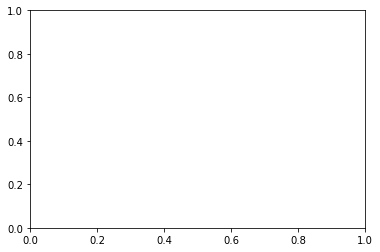

In [45]:
# Generate plots 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_list, N[0], linestyle = '-', label = "N_a")

# plot approximate solution (use discrete points with no connecting line)
ax.plot()

plt.legend()
plt.xlabel("time (units)")
plt.ylabel("Capacitor charge (units)")

In [40]:
N_a0, N_b0 = 100, 100
N = np.array([N_a0, N_b0])
N*.1

array([10., 10.])

In [43]:
N_list = []
N_list = np.array(N_list)
N_list = np.append(N_list, [0, 0])
N_list

array([0., 0.])

Text(0, 0.5, 'V_in (units)')

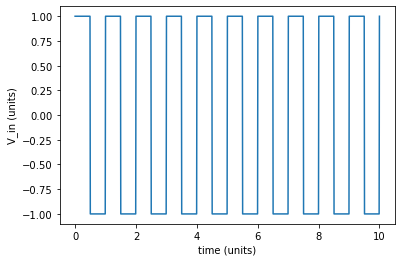

In [83]:
t = np.linspace(t0,t_final,1000) 
V_in = sp.signal.square(t*2*np.pi)

plt.plot(t, V_in)
plt.xlabel("time (units)")
plt.ylabel("V_in (units)")
